In [2]:
#importing the libariries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/ML")

In [4]:
ls

'2010 capital bikes'/                          Loan_Prediction_Classification/
'Bigmart sales'/                               MNIST/
'Black Friday'/                               'MNIST Keras.ipynb'
 boostingML_BigMart.ipynb                     'python with ml and projects.rar'
 Boston/                                       siva.jpg
 Dimentionality_reduction_fashionMNIST.ipynb   training.csv
 dogscats/                                    'Turkish student data set'/
 dogscats.keras.ipynb                          Untitled0.ipynb
 gridsearch                                    Untitled1.ipynb
'Heights and Weights'/                        'wine dataset'/
 KavithabigmartsalesML.ipynb


In [0]:
os.chdir("/content/gdrive/My Drive/ML/Black Friday")

In [6]:
ls

test.csv  test_HujdGe7.zip  train.csv  train_oSwQCTC.zip


In [0]:
#reading the data
train=pd.read_csv("train.csv")

In [8]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
#finding the dtypes of columns

object=[]
integer=[]
float=[]
categorical=[]
for i in train:
  #print(i+" has dtype as: "+str(train[i].dtype))
  if train[i].dtype=='object':
    object.append(i)
  elif train[i].dtype=='int64':
    integer.append(i)
  elif train[i].dtype=='float64':
    float.append(i)
    
df=pd.DataFrame([object,integer,float])
df.index=['object','integer','float']

In [0]:
df2=df.T

In [13]:
df2

,object,integer,float
0,Product_ID,User_ID,Product_Category_2
1,Gender,Occupation,Product_Category_3
2,Age,Marital_Status,None
3,City_Category,Product_Category_1,None
4,Stay_In_Current_City_Years,Purchase,None


In [0]:
#finding percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)

In [15]:
percent_missing

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [0]:
train1=train

In [0]:
#dropping the columns which have missing values greater than 30%
train2=train1.drop(columns=['User_ID','Product_Category_3','Product_ID','Product_Category_2'],axis=1)

In [18]:
train2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [19]:
train2.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [0]:
# #filling nan values with mode
# train2['Product_Category_2'].fillna(train2['Product_Category_2'].median(), inplace=True)

In [21]:

train2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [22]:
train2.shape

(550068, 8)

In [0]:
#finding percentage of missing values
percent_missing = train2.isnull().sum() * 100 / len(train2)

In [24]:
percent_missing

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Purchase                      0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b8dc50860>,
      dtype=object)

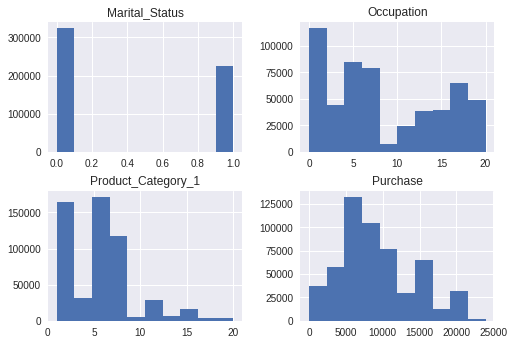

In [25]:
#plotting the histogram to check the distribution
train2.hist()

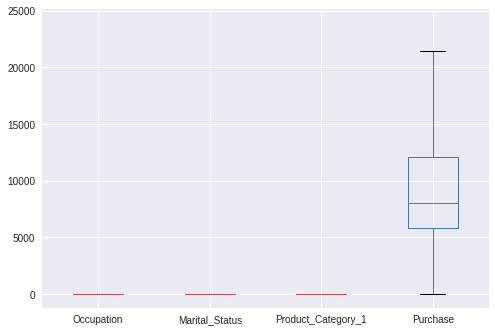

In [26]:
#plotting the boxplot for checking the outliers
train2.boxplot()

In [27]:
train2.quantile(.25)

Occupation               2.0
Marital_Status           0.0
Product_Category_1       1.0
Purchase              5823.0
Name: 0.25, dtype: float64

In [28]:
train2.quantile(.50)

Occupation               7.0
Marital_Status           0.0
Product_Category_1       5.0
Purchase              8047.0
Name: 0.5, dtype: float64

In [29]:

train2.quantile(.75)

Occupation               14.0
Marital_Status            1.0
Product_Category_1        8.0
Purchase              12054.0
Name: 0.75, dtype: float64

In [30]:
train2.quantile(0.75-0.25)

Occupation               7.0
Marital_Status           0.0
Product_Category_1       5.0
Purchase              8047.0
Name: 0.5, dtype: float64

In [31]:
train2.std()

Occupation               6.522660
Marital_Status           0.491770
Product_Category_1       3.936211
Purchase              5023.065394
dtype: float64

In [32]:
train2.skew()

Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Purchase              0.600140
dtype: float64

In [33]:
train2.kurt()

Occupation           -1.216114
Marital_Status       -1.864997
Product_Category_1    1.234757
Purchase             -0.338378
dtype: float64

In [34]:
train2.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

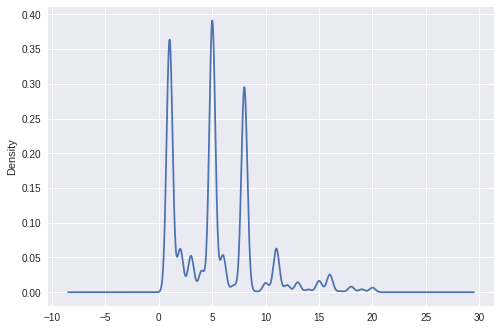

In [35]:
#plotting Kde plot to check for normal distribution
import seaborn as sns
train.Product_Category_1.plot.kde()

In [36]:
train.Product_Category_1.count

<bound method Series.count of 0          3
1          1
2         12
3         12
4          8
5          1
6          1
7          1
8          1
9          8
10         5
11         8
12         8
13         1
14         5
15         4
16         2
17         5
18         1
19         1
20         5
21         8
22         8
23         8
24         1
25         6
26         8
27         5
28         5
29         2
          ..
550038    20
550039    20
550040    19
550041    20
550042    20
550043    19
550044    19
550045    20
550046    20
550047    20
550048    20
550049    20
550050    20
550051    20
550052    20
550053    20
550054    19
550055    20
550056    20
550057    19
550058    20
550059    19
550060    20
550061    20
550062    20
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 550068, dtype: int64>

In [0]:
x1=np.sqrt(train.Product_Category_1)

In [38]:

x1.skew()

0.15434171738687683

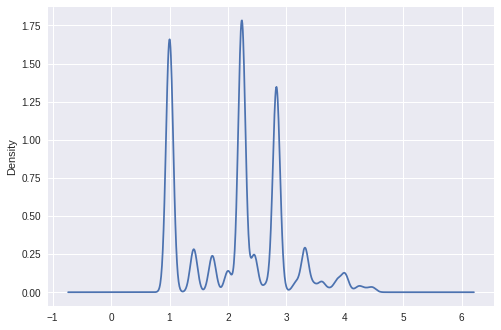

In [39]:
x1.plot.kde()

In [40]:
x1.head()

0    1.732051
1    1.000000
2    3.464102
3    3.464102
4    2.828427
Name: Product_Category_1, dtype: float64

In [0]:
# train['Product_Category_1'] = train['x1'].values

In [0]:
#train2=train2.drop(['Product_Category_1'],axis=1)

In [41]:
train2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [0]:
#train2.insert(columns='x1',axis=1)

In [0]:
#adding new column to dataframe, this column obtained after checking the skew,so dropped the existing column and adding new column
#train2 = train2.assign(x1=x1.values)

In [42]:
train2.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,2,0,3,8370
1,F,0-17,10,A,2,0,1,15200
2,F,0-17,10,A,2,0,12,1422
3,F,0-17,10,A,2,0,12,1057
4,M,55+,16,C,4+,0,8,7969


In [0]:
# train['Product_Category_1'] = train['x1']

In [0]:
# train.replace(to_replace=r'Product_Category_1', value='x1', regex=True)

In [0]:
# train['Product_Category_1'] = ['x1'].values

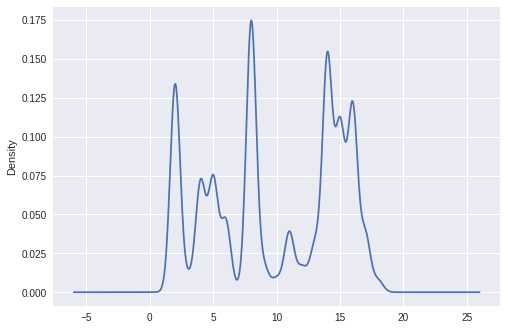

In [43]:
train.Product_Category_2.plot.kde()

In [0]:
train2.corr()#from correlation we can observe that none of the feature have high correlation on target.

,Occupation,Marital_Status,Product_Category_1,Purchase
Occupation,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.024280,1.000000,0.019888,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.020833,-0.000463,-0.343703,1.000000


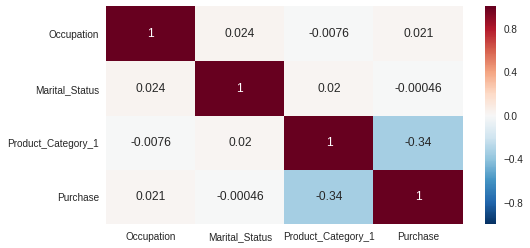

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4) # only product_category_1 has effect  on target purchase

ax=sns.heatmap(train2.corr(),annot=True)

In [46]:
from scipy import stats

stats.chi2_contingency(train2)

TypeError: ignored

In [0]:
train3=train2.drop(columns=['Purchase'],axis=1)

In [48]:
train3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,F,0-17,10,A,2,0,3
1,F,0-17,10,A,2,0,1
2,F,0-17,10,A,2,0,12
3,F,0-17,10,A,2,0,12
4,M,55+,16,C,4+,0,8


In [0]:
y=train2[ 'Purchase']

In [50]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [0]:
x_train1=pd.get_dummies(train3)

In [52]:
x_train1.shape

(550068, 20)

In [53]:
y.shape

(550068,)

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x_train1,y,test_size=0.3,random_state=1)

In [56]:
x_train.head()

,Occupation,Marital_Status,Product_Category_1,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
396797,6,0,8,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
316599,12,1,5,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
428580,1,1,5,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
387279,20,0,8,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
421397,7,0,5,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [57]:

x_train.shape

(385047, 20)

In [58]:

y_train.shape

(385047,)

In [59]:
x_test.head()

,Occupation,Marital_Status,Product_Category_1,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
470060,11,0,8,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
395974,16,1,4,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
14234,20,1,8,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
72183,17,1,8,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
272536,7,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [60]:
x_test.shape

(165021, 20)

In [61]:
y_test.shape

(165021,)

In [62]:
y_train.head()

396797    4261
316599    5354
428580    8805
387279    6194
421397    7082
Name: Purchase, dtype: int64

In [63]:
y_test.head()

470060     8013
395974     2769
14234      5952
72183      9914
272536    15472
Name: Purchase, dtype: int64

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1,n_estimators=100,warm_start=True)
n_batches=int(x_train.shape[0]/1000)
for i in range(n_batches+1):
    train_x=x_train[i:1000]
    train_y=y_train[i:1000]
    rf.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: 

In [65]:
x_train.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [66]:
rf.predict(x_test)

array([7799.67      , 2070.34      , 4640.567     , ..., 1611.6       ,
       8846.81733333, 7292.62      ])

In [0]:
# a=[1,2,3,4,5]
# print(a[2:4])

In [0]:
# x_train1.shape[0]/100

In [0]:
# x_train1.shape[0]

In [0]:
# import pickle
# filename = 'rf'
# outfile = open(filename,'wb')
# pickle.dump(rf,outfile)
# outfile.close()

In [67]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=True)

In [68]:
rf.score(train_x,train_y)

0.9245871446229902

In [69]:
rf.score(x_test,y_test)

0.5565742122786419

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1,n_estimators=1000,min_samples_split=8,warm_start=True)
n_batches=int(x_train1.shape[0]/1000)
for i in range(n_batches+1):
    train_x=x_train[i:1000]
    train_y=y_train[i:1000]
    rf.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: 

In [71]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=True)

In [72]:
rf.score(train_x,train_y)

0.8527159872377085

In [73]:
rf.score(x_test,y_test)

0.5904320156337732

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1,n_estimators=200,min_samples_split=8,warm_start=True,max_depth=90,
 max_features=3,min_samples_leaf=3,)
n_batches=int(x_train.shape[0]/1000)
for i in range(n_batches+1):
    train_x=x_train[i:1000]
    train_y=y_train[i:1000]
    rf.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:308: UserWarning: 

In [75]:
rf.score(train_x,train_y)

0.4747247657414383

In [76]:
rf.score(x_test,y_test)

0.28817446174244987

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
n_batches=int(x_train.shape[0]/1000)
for i in range(n_batches+1):
    train_x=x_train[i:1000]
    train_y=y_train[i:1000]
    rf.fit(train_x,train_y)
grid_search.fit(train_x,train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
n_batches=int(x_train.shape[0]/1000)
for i in range(n_batches+1):
    train_x=x_train[i:1000]
    train_y=y_train[i:1000]
    rf.fit(train_x,train_y)
grid_search.fit(train_x,train_y)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [79]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [80]:
rf.score(train_x,train_y)

0.9177150456792564

In [81]:
rf.score(x_test,y_test)

0.5168143244527871

In [0]:
best_grid = grid_search.best_estimator_


In [84]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
def evaluate(model, test_features,y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
grid_accuracy = evaluate(best_grid,x_test,y_test)

Model Performance
Average Error: 2363.2137 degrees.
Accuracy = 49.10%.


In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [0]:
model=xgb.XGBRegressor()

In [90]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [91]:
model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [92]:
model.score(train_x,train_y)

0.7552544115535096

In [93]:
model.score(x_test,y_test)

0.6053367243552947

In [0]:
test_pred_xgboost=model.predict(x_test)

In [95]:
mse_test_xgboost=mean_squared_error(y_test,test_pred_xgboost)

NameError: ignored

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mse_test_xgboost=mean_squared_error(y_test,test_pred_xgboost)

In [98]:
mse_test_xgboost

9974535.026586896

In [0]:
train_pred_xgboost=model.predict(x_train)

In [0]:
mse_train_xgboost=mean_squared_error(y_train,train_pred_xgboost)

In [122]:
mse_train_xgboost

10031210.085564122

In [0]:
xgb2=xgb.XGBRegressor(n_estimators=200,min_child_weight= 10,max_depth=6,learning_rate=0.1)

In [101]:
xgb2.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=10, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [102]:
xgb2.score(train_x,train_y)

0.8900229972126743

In [103]:
xgb2.score(x_test,y_test)

0.5252013966415412

In [0]:
test_pred_xgboost=xgb2.predict(x_test)

In [105]:
test_pred_xgboost

array([ 8434.759 ,  3968.5522,  5913.5845, ...,  2457.453 , 17132.615 ,
        7256.741 ], dtype=float32)

In [0]:
train_pred_xgboost=xgb2.predict(x_train)

In [0]:
mse_train_xgboost=mean_squared_error(y_train,train_pred_xgboost)

In [125]:
mse_train_xgboost

12112982.079733854

In [0]:
mse_test_xgboost=mean_squared_error(y_test,test_pred_xgboost)

In [107]:
mse_test_xgboost

11999837.816267874

In [0]:
xgb3=xgb.XGBRegressor(n_estimators=1000,min_child_weight= 20,max_depth=10,learning_rate=0.5)

In [127]:
xgb3.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=12, min_child_weight=20, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [128]:
xgb3.score(train_x,train_y)

0.6413414656113821

In [129]:
xgb3.score(x_test,y_test)

0.503242009893862

In [0]:
train_pred_xgboost=xgb3.predict(x_train)

In [0]:
mse_train_xgboost=mean_squared_error(y_train,train_pred_xgboost)

In [132]:
mse_train_xgboost

12599291.384786362

In [0]:
xgb4=xgb.XGBRegressor(n_estimators=500,min_child_weight= 20,max_depth=12,learning_rate=0.01)

In [114]:
xgb4.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=12, min_child_weight=20, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [115]:
xgb4.score(train_x,train_y)

0.6413414656113821

In [116]:
xgb4.score(x_test,y_test)

0.503242009893862

In [0]:
test_pred_xgboost=xgb4.predict(x_test)

In [0]:
mse_test_xgboost=mean_squared_error(y_test,test_pred_xgboost)

In [119]:
mse_test_xgboost

12554829.085519586

In [0]:
train_pred_xgboost=xgb4.predict(x_train)

In [0]:
mse_train_xgboost=mean_squared_error(y_train,train_pred_xgboost)

In [136]:
mse_train_xgboost

12599291.384786362